## Introduction

Our stated objective is:
> This study will employ a structured procedure including data preprocessing, designing a custom CNN architecture, model 
training, and model evaluation. 
To enhance gesture accuracy and model performance, images will be filtered through 
different preprocessing steps such as normalising by scaling pixels between 0 and 1. The 
carefully planned architecture starts with a multi-layer convolutional block, where each block 
contains convolutional layers (with 3x3 or 5x5 filter sizes) for spatial feature extraction, along 
with a non-linear activation function like ReLU (Rectified Linear Unit) and pooling layers for 
spatial dimensionality reduction. The feature maps will be flattened and passed on to 
fully-connected (dense) layers, which will have dropout layers to take care of overfitting. Finally, 
the classification will be carried out using the softmax layer, providing 29 classes of 
probabilities.

## Key concepts

- **Deep Learning**

    - Deep Learning is about finding patterns in data using a ***neural network***, a model inspired by the human brain, and making predictions based on these patterns.

    - A ***layer*** is a group of interconnected **neurons** that can learn from data and make decisions. A neural network is made up of multiple layers stacked one upon the other (hence the word "deep"). The output of one layer becomes the input for the layer right below it.

    - Each following layer helps the model learn more complex patterns.  The first layer starts by learning simple features (like identifying words from sentences). The later layers learn more complex features (like understanding what each word implies. e.g., love -> positive, hate -> negative).

    - Generally,

        - **Input layer:** Takes in the data.

        - **Hidden layers:** Processes and learns patterns from the data. They are called "hidden" because no one can really see or understand what happens inside them, just like how the human brain is not fully understood. Two general types:

            - **Fully connected layers (dense layers):** 

                - Every neuron is connected to every neuron in the previous layer. The fully connected layer takes the information from all the neurons in the previous layer and mixes it together to make a decision.

                - In an image recognition task, if the previous layer has learned features like edges or textures, the fully connected layer combines those features to identify objects like "cat" or "dog."

            - **Activation layers:** 

                - The activation layer takes the weighted sum of features from a neuron, and decides whether this neuron should "fire" (pass information to the next layer) that sum should influence the next step in the network.

                - It uses an **activation function** to check if this neuron should "fire" (pass the information to next layer) or not. For example, in the ReLU function, if the sum is negative, it will block the information (turning it to zero).

                    - **Example**: Say we are predicting if a fruit is an apple or orange based on two features:

                        - Color: Red (0) or Orange (1), Shape: Round (1) or Elliptical (0)

                    - Let the random weights for each feature be:

                        - Color: 0.5, Shape: 1.5

                    - Now, for an image of an Apple where the Color = Red and Shape = Round:

                        - The network multiplies the input by the weights:

                        - Color: Red = 0, so weighted sum for color = 0 * 0.5 = 0. Shape: Round = 1, so weighted sum for shape = 1 * 1.5 = 1.5. The total weighted sum = 0 + 1.5 = 1.5.

                    - This sum is then passed through an activation function (let’s say ReLU):

                        - ReLU turns any negative value to 0. Since the weighted sum is positive, ReLU allows the value to pass through as 1.5.

                    - But for an image of a Carrot where the Color = Red and Shape = Eliptical,

                        - Color: Orange = 1, so weighted sum for color = 1 * 0.5 = 0.5. Shape: Elliptical = -1, so weighted sum for shape= -1 * 1.5 = -1.5 (elliptical shape gives a negative contribution). Total weighted sum = 0.5 - 1.5 = -1.

                    - Since the weighted sum is negative (-1.5), ReLU will turn it to 0, as ReLU only passes positive values.
                    - This helps the network focus on the most important features and ignore less important ones that don't contribute to the final prediction (a Carrot in a model predicting Apple or Orange), passing only relevant information to the next layer.

                - Cutting off the negative values adds non-linearity, letting the network learn complex patterns instead of just simple straight-line relationships.

        - **Output Layer:** Final result (e.g., classification label or predicted value).

- **Convolutional Neural Network (CNN)**

    - CNN is a type of deep learning model for images. 

    - First, it learns simple patterns in an image, such as edges, lines, and colours.

    - As it moves through more layers, it combines these simple patterns to recognise more complex shapes and structures.

    - Throughout this process, it also keeps track of where each pattern appears in the image.
    By building up understanding in this way — from small details to full objects (***spatial hierarchies of features***) — the model starts to identify what the image shows. On Python this is automatic.

- A CNN is organised into a series of layers. Each layer has a specific role to gradually transform the raw image into a set of class predictions. The standard architecture usually follows this pattern:

    - Input Layer
Receives the raw pixel values of the image, often normalised (e.g., values between 0 and 1).

    - Convolutional Layers
Apply multiple filters to the input image to detect low-level features like edges, corners, and textures. Deeper layers detect more complex patterns like shapes or objects.

    - Activation Layers (usually ReLU)
Applied immediately after convolution to introduce non-linearity, allowing the network to learn complex relationships.

    - Pooling Layers (typically Max Pooling)
Reduce the spatial dimensions of the feature maps, keeping the most important information while decreasing the computational load.

    - (Optional) Additional Convolutional and Pooling Blocks
Several convolution-pooling pairs are often stacked to allow the network to learn increasingly abstract and complex features at different levels.

    - Flatten Layer
Flattens the output of the final pooling layer into a 1D vector to prepare it for the fully-connected layers.

    - Fully-Connected (Dense) Layers
Combine the features learned by the convolutional layers to make predictions. These layers behave like traditional neural networks.

    - Dropout Layer (often added before or between dense layers)
Randomly drops some neurons during training to prevent overfitting and improve generalisation.

    - Output Layer (typically Softmax for classification tasks)
Produces the final prediction by outputting a probability distribution over all target classes.



- Convolutional Layer
Applies a set of filters (small matrices like 3×3 or 5×5) over the input image to detect low-level features such as edges, textures, and patterns.

- Activation Function (ReLU)
Introduces non-linearity into the model by replacing negative values with zero, allowing the network to model complex patterns.

- Pooling Layer
Reduces the spatial dimensions (width and height) of feature maps, keeping the most important information while making the model faster and more robust.

- Flattening
Converts the 2D feature maps output by convolutional and pooling layers into a 1D vector to be used by fully-connected layers.

- Fully-Connected (Dense) Layer
A traditional neural network layer where each neuron connects to every neuron in the next layer, used for combining extracted features and making final predictions.

- Dropout Layer
A regularisation technique that randomly disables a fraction of neurons during training to prevent the model from overfitting the training data.

- Softmax Layer
The final output layer for multi-class classification that converts raw model outputs into probabilities across all classes, ensuring they sum to 1.

- Data Preprocessing
Preparing raw input data before feeding it into the model, such as scaling pixel values between 0 and 1 to improve training stability and performance.

- Model Training
The phase where the CNN learns from data by adjusting its internal parameters using optimisation algorithms and loss functions.

- Model Evaluation
Assessing the trained model’s performance on new, unseen data to measure how accurately it generalises, using metrics like accuracy or confusion matrices.

### Convolutional Block
A convolutional block is a repeated structure inside a CNN that groups several key operations together. Instead of treating each layer separately, CNNs often bundle them into blocks to form a more organised and powerful model.

A typical convolutional block includes:

One or more Convolutional Layers
Apply filters to detect patterns from the input or from previous layers.

Activation Function (usually ReLU)
Introduces non-linearity immediately after each convolution, enabling the network to learn complex features.

Pooling Layer (usually Max Pooling)
Reduces the spatial size after convolution and activation, keeping only the most important information.

(Optional) Batch Normalisation
Sometimes added between convolution and activation to stabilise and speed up training by normalising outputs.

- **Epoch**
    - An epoch is one complete pass of the entire training dataset through the model. During each epoch, the model looks at all the layers in the neural network and processes the data step by step.

    - The model uses its layers to make predictions, then compares them to the actual answers. Based on the differences (errors), it adjusts the settings (weights) inside the layers.

    - With each epoch, the model learns more about the patterns in the data and gets better at making predictions.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Data preparation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
data_dir = '../dataset/asl_alphabet_train'

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


Building model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Input

model = Sequential([
    # Block 1
    Input(shape=(200, 200, 3)),  # Explicit Input layer
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    # Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    # Block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten and Dense layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(29, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 196, 196, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 96, 96, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    17,334,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,436,765 (66.52 MB)

 Trainable params: 17,436,765 (66.52 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Define Early Stopping Callback

In [3]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=3,              # Stop after 3 epochs without improvement
    restore_best_weights=True  # Keep the best model weights
)

Training the model:

1. Fit the model

Initial run:

In [11]:
# Fit the model to the training data with validation and early stopping
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/30
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.2288 - loss: 2.6480

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 19101s 9s/step - accuracy: 0.2289 - loss: 2.6477 - val_accuracy: 0.5495 - val_loss: 1.3226
Epoch 2/30
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 762s 350ms/step - accuracy: 0.6369 - loss: 1.0819 - val_accuracy: 0.6314 - val_loss: 1.0694
Epoch 3/30
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 760s 350ms/step - accuracy: 0.7580 - loss: 0.7090 - val_accuracy: 0.7266 - val_loss: 0.8369
Epoch 4/30
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1251s 575ms/step - accuracy: 0.8114 - loss: 0.5464 - val_accuracy: 0.7637 - val_loss: 0.7704
Epoch 5/30
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 3264s 2s/step - accuracy: 0.8499 - loss: 0.4441 - val_accuracy: 0.7723 - val_loss: 0.7978
Epoch 6/30
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 3729s 2s/step - accuracy: 0.8664 - loss: 0.3907 - val_accuracy: 0.7832 - val_loss: 0.7248
Epoch 7/30
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 3675s 2s/step - accuracy: 0.8866 - loss: 0.3384 - val_accuracy: 0.7861 - val_loss: 0.7548
Epoch 8/30
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 3681s 2s/step - accuracy: 0.8972 - lo

Added BatchNormalization after each convolutional and dense layer to stabilize learning and improve validation accuracy.

Added L2 Regularization (0.001) to prevent overfitting by penalizing large weights.

Replaced Flatten with GlobalAveragePooling2D to drastically reduce parameters (will drop from 17M to under 500K).

Enhanced data augmentation with wider rotation range and brightness variations to improve generalization.

Added learning rate scheduler (ReduceLROnPlateau) to automatically reduce learning rate when validation loss plateaus.

Slightly reduced dropout from 0.5 to 0.4 as we're now using multiple regularization techniques.



In [4]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Input layer
inputs = Input(shape=(200, 200, 3))

# Block 1
x = Conv2D(32, (5, 5), activation='relu', kernel_regularizer=l2(0.001))(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

# Block 2
x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

# Block 3
x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

# Global Average Pooling instead of Flatten
x = GlobalAveragePooling2D()(x)

# Dense layer with regularization
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  # Slightly reduced dropout

# Output layer
outputs = Dense(29, activation='softmax')(x)

# Create model
model = Model(inputs, outputs)


In [5]:
# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,       # Increased rotation range
    width_shift_range=0.2,   # Increased shift range
    height_shift_range=0.2,
    zoom_range=0.2,          # Increased zoom range
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]  # Add brightness variation
)

# Learning rate scheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.00001
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 196, 196, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 196, 196, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 96, 96, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,181 (535.86 KB)

 Trainable params: 136,221 (532.11 KB)

 Non-trainable params: 960 (3.75 KB)

In [6]:
# Compile with the same optimizer but add metrics
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train with both callbacks
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Increased epochs since we have early stopping
    callbacks=[
        early_stopping,
        reduce_lr
    ],
    verbose=1
)

Epoch 1/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3273 - loss: 2.6823

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 8726s 4s/step - accuracy: 0.3274 - loss: 2.6819 - val_accuracy: 0.4804 - val_loss: 2.0926 - learning_rate: 0.0010
Epoch 2/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2700s 1s/step - accuracy: 0.8114 - loss: 0.8406 - val_accuracy: 0.5552 - val_loss: 2.1284 - learning_rate: 0.0010
Epoch 3/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2429s 1s/step - accuracy: 0.8923 - loss: 0.5699 - val_accuracy: 0.5525 - val_loss: 2.1868 - learning_rate: 0.0010
Epoch 4/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1441s 662ms/step - accuracy: 0.9605 - loss: 0.3628 - val_accuracy: 0.8349 - val_loss: 0.8209 - learning_rate: 2.0000e-04
Epoch 5/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2707s 1s/step - accuracy: 0.9744 - loss: 0.2758 - val_accuracy: 0.8337 - val_loss: 0.8827 - learning_rate: 2.0000e-04
Epoch 6/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1538s 707ms/step - accuracy: 0.9781 - loss: 0.2327 - val_accuracy: 0.8630 - val_loss: 0.6409 - learning_rate: 2.0000e-04
Epoch 7/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1986s 892ms/ste

Three convolutional blocks with increasing filter complexity (32→64→128)

Spatial dropout (dropping entire feature maps) after each conv block to reduce overfitting

L2 regularization (0.002) on all convolutional and dense layers

BatchNormalization after each convolution for faster, more stable training

GlobalAveragePooling2D instead of Flatten to drastically reduce parameters

Enhanced training process with learning rate scheduling and strong data augmentation

In [7]:
# Import required libraries
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,       # Increased rotation range
    width_shift_range=0.2,   # Increased shift range
    height_shift_range=0.2,
    zoom_range=0.2,          # Increased zoom range
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Brightness variation
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Define paths and image dimensions
data_dir = '../dataset/asl_alphabet_train'  # Adjust if needed
img_height, img_width = 200, 200
batch_size = 32
num_classes = 29  # A-Z plus SPACE, DELETE, NOTHING

# Data generators
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Build the improved model with Functional API
inputs = Input(shape=(img_height, img_width, 3))

# Block 1
x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002))(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)
x = SpatialDropout2D(0.1)(x)

# Block 2
x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)
x = SpatialDropout2D(0.1)(x)

# Block 3
x = Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)
x = SpatialDropout2D(0.1)(x)

# Global Average Pooling instead of Flatten (drastically reduces parameters)
x = GlobalAveragePooling2D()(x)

# Dense layers with regularization
x = Dense(128, activation='relu', kernel_regularizer=l2(0.002))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,  # Slightly increased patience
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

# Training parameters
epochs = 50


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 200, 200, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_6             │ (None, 100, 100, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_7             │ (None, 50, 50, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_8             │ (None, 25, 25, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,909 (448.86 KB)

 Trainable params: 114,205 (446.11 KB)

 Non-trainable params: 704 (2.75 KB)

In [8]:
# To train the model, run:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


I0000 00:00:1745671177.977774   47704 service.cc:152] XLA service 0x7fb8040076e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745671177.977940   47704 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-04-26 16:39:38.109647: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745671178.742850   47704 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1745671193.889364   47704 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 409s 179ms/step - accuracy: 0.1088 - loss: 3.8525 - val_accuracy: 0.1821 - val_loss: 3.1428 - learning_rate: 0.0010
Epoch 2/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 341s 157ms/step - accuracy: 0.3759 - loss: 2.2342 - val_accuracy: 0.5389 - val_loss: 1.6321 - learning_rate: 0.0010
Epoch 3/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 379s 174ms/step - accuracy: 0.5659 - loss: 1.6142 - val_accuracy: 0.6530 - val_loss: 1.2374 - learning_rate: 0.0010
Epoch 4/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 348s 160ms/step - accuracy: 0.6586 - loss: 1.3460 - val_accuracy: 0.7352 - val_loss: 1.0995 - learning_rate: 0.0010
Epoch 5/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 331s 152ms/step - accuracy: 0.7015 - loss: 1.2375 - val_accuracy: 0.6926 - val_loss: 1.2445 - learning_rate: 0.0010
Epoch 6/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 336s 154ms/step - accuracy: 0.7311 - loss: 1.1533 - val_accuracy: 0.7479 - val_loss: 1.0229 - learning_rate: 0.0010
Epoch 7/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 329s 151ms/step - acc

Double Convolution in Each Block:

Added two consecutive 3×3 convolutions in each block instead of a single layer

This creates a deeper feature hierarchy while keeping the parameter count low

Residual Connection in Block 3:

Added a skip connection that helps with gradient flow during backpropagation

Improves learning of complex features without increasing depth excessively

Increased Regularization:

L2 regularization increased to 0.0015 from 0.001

Progressive SpatialDropout2D (0.1→0.15→0.2) to increasingly regularize deeper features

BatchNormalization After Every Conv Layer:

Stabilizes training and accelerates convergence

Reduces internal covariate shift between layers

Smaller Initial Filter Size:

Using 3×3 filters throughout (instead of 5×5) reduces parameters while maintaining receptive field through stacking

GlobalAveragePooling2D:

Retained from your current model to drastically reduce parameters compared to Flatten

Provides some built-in regularization by averaging features

In [9]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, SpatialDropout2D
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Add
from tensorflow.keras.regularizers import l2

# Input layer
inputs = Input(shape=(200, 200, 3))

# Block 1 - Initial Feature Extraction
x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(inputs)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)
x = SpatialDropout2D(0.1)(x)

# Block 2 - Intermediate Features
x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)
x = SpatialDropout2D(0.15)(x)

# Block 3 - Advanced Features with Residual Connection
x_shortcut = Conv2D(128, (1, 1), padding='same')(x)  # Shortcut connection
x = Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(x)
x = BatchNormalization()(x)
x = Add()([x, x_shortcut])  # Add residual connection
x = MaxPooling2D(2, 2)(x)
x = SpatialDropout2D(0.2)(x)

# Global Average Pooling instead of Flatten
x = GlobalAveragePooling2D()(x)

# Dense layers with regularization
x = Dense(128, activation='relu', kernel_regularizer=l2(0.002))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Output layer
outputs = Dense(29, activation='softmax')(x)

model = Model(inputs, outputs)


In [10]:
# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=6,  # Slightly increased patience
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

# Compile with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 200, 200,  │        896 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 200,  │        128 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 200, 200,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 200,  │        128 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 100, 100,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_9 │ (None, 100, 100,  │          0 │ max_pooling2d_9[… │
│ (SpatialDropout2D)  │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 100, 100,  │     18,496 │ spatial_dropout2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 100,  │        256 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 100, 100,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 100,  │        256 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 50, 50,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 50, 50,    │          0 │ max_pooling2d_10… │
│ (SpatialDropout2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 50, 50,    │     73,856 │ spatial_dropout2… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 50, 50,    │        512 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 50, 50,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 50, 50,    │        512 │ conv2d_15[0][0] 

 Total params: 317,885 (1.21 MB)

 Trainable params: 316,733 (1.21 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [11]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 424s 187ms/step - accuracy: 0.1309 - loss: 3.9067 - val_accuracy: 0.3075 - val_loss: 2.4240 - learning_rate: 0.0010
Epoch 2/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 384s 176ms/step - accuracy: 0.5154 - loss: 1.8418 - val_accuracy: 0.6754 - val_loss: 1.5014 - learning_rate: 0.0010
Epoch 3/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 386s 177ms/step - accuracy: 0.7417 - loss: 1.1988 - val_accuracy: 0.8504 - val_loss: 0.8814 - learning_rate: 0.0010
Epoch 4/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 384s 176ms/step - accuracy: 0.8054 - loss: 1.0085 - val_accuracy: 0.8254 - val_loss: 0.9695 - learning_rate: 0.0010
Epoch 5/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 383s 176ms/step - accuracy: 0.8255 - loss: 0.9417 - val_accuracy: 0.6887 - val_loss: 1.4186 - learning_rate: 0.0010
Epoch 6/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 380s 174ms/step - accuracy: 0.8410 - loss: 0.8896 - val_accuracy: 0.8230 - val_loss: 0.9528 - learning_rate: 0.0010
Epoch 7/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 371s 170ms

Self-Attention Mechanism: Added lightweight spatial attention to focus on the most informative regions of hand gestures.

Residual Blocks Throughout: Now using residual connections in all blocks to improve gradient flow, enabling deeper feature learning without vanishing gradients.

Enhanced Data Augmentation: Added shear transforms and channel shifts to make the model more robust to variations in lighting and hand positioning.

Layer Normalization: Added after global pooling to stabilize feature distributions before classification.

Cyclic Learning Rate Option: Alternative learning rate scheduler that can help escape local minima.

Stronger Regularization: Slightly increased L2 regularization (0.0018 vs 0.0015) to further prevent overfitting.

Increased Training Duration: More epochs (75) with longer early stopping patience (8) gives the model time to find more optimal weights.

In [12]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout2D, Add, Multiply, Reshape, Permute
from tensorflow.keras.layers import LayerNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import tensorflow as tf
import math
import numpy as np

# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    shear_range=0.1,
    channel_shift_range=0.1
)

# Define a simple self-attention module
def self_attention_block(inputs, filters):
    # Spatial attention
    x = Conv2D(filters//8, kernel_size=1)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Generate attention map
    attention = Conv2D(1, kernel_size=1)(x)
    attention = Activation('sigmoid')(attention)
    
    # Apply attention
    return Multiply()([inputs, attention])

# Residual block with attention
def residual_block(inputs, filters, kernel_size=3, strides=1, attention=True):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same', 
               kernel_regularizer=l2(0.0018))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same',
               kernel_regularizer=l2(0.0018))(x)
    x = BatchNormalization()(x)
    
    # Add attention if requested
    if attention:
        x = self_attention_block(x, filters)
    
    # Handle input shape mismatch for the residual connection
    if strides > 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = inputs
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Cyclic learning rate scheduler
def cyclic_lr(epoch):
    initial_lr = 0.001
    max_lr = 0.01
    step_size = 10.0
    
    cycle = math.floor(1 + epoch / (2 * step_size))
    x = abs(epoch / step_size - 2 * cycle + 1)
    lr = initial_lr + (max_lr - initial_lr) * max(0, (1 - x))
    return lr

# Build enhanced model
inputs = Input(shape=(200, 200, 3))

# Initial convolution
x = Conv2D(32, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.0018))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Block 1 with residual connections
x = residual_block(x, 32, strides=1, attention=False)
x = residual_block(x, 32, strides=2, attention=True)  # Downsample
x = SpatialDropout2D(0.1)(x)

# Block 2 with residual connections
x = residual_block(x, 64, strides=1, attention=False)
x = residual_block(x, 64, strides=2, attention=True)  # Downsample
x = SpatialDropout2D(0.15)(x)

# Block 3 with residual connections and attention
x = residual_block(x, 128, strides=1, attention=True)
x = residual_block(x, 128, strides=2, attention=True)  # Downsample
x = SpatialDropout2D(0.2)(x)

# Global pooling and feature normalization
x = GlobalAveragePooling2D()(x)
x = LayerNormalization()(x)

# Classification head
x = Dense(128, activation='relu', kernel_regularizer=l2(0.0025))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

outputs = Dense(29, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile with a slightly lower initial learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Display model summary
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 200, 200,  │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 200,  │        128 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 200, 200,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 200, 200,  │      9,248 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 200,  │        128 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 200, 200,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 200, 200,  │      9,248 │ activation_1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 200,  │        128 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 200, 200,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 200, 200,  │          0 │ add_1[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 100, 100,  │      9,248 │ activation_2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 100,  │        128 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 100, 100,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 100, 100,  │      9,248 │ activation_3[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 100,  │        128 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 100, 100,  │        132 │ batch_normalizat

 Total params: 747,337 (2.85 MB)

 Trainable params: 744,305 (2.84 MB)

 Non-trainable params: 3,032 (11.84 KB)

In [13]:
# Define callbacks with both cyclic LR and reduce on plateau for flexibility
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=8,  # Increased patience to allow learning more complex patterns
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

# Option 1: Use cyclic learning rate
lr_scheduler = LearningRateScheduler(cyclic_lr)

# Choose which LR strategy to use:
# callbacks = [early_stopping, lr_scheduler]  # Cyclic LR
callbacks = [early_stopping, reduce_lr]     # Reduce on plateau

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=75,  # Increased epochs with reliable early stopping
    callbacks=callbacks,
    verbose=1
)

Epoch 1/75
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 474s 204ms/step - accuracy: 0.0708 - loss: 5.1761 - val_accuracy: 0.2021 - val_loss: 3.1875 - learning_rate: 5.0000e-04
Epoch 2/75
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 455s 209ms/step - accuracy: 0.2788 - loss: 2.8158 - val_accuracy: 0.1707 - val_loss: 4.6165 - learning_rate: 5.0000e-04
Epoch 3/75
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 460s 212ms/step - accuracy: 0.6042 - loss: 1.5760 - val_accuracy: 0.7372 - val_loss: 1.2008 - learning_rate: 5.0000e-04
Epoch 4/75
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 457s 210ms/step - accuracy: 0.7650 - loss: 1.0814 - val_accuracy: 0.8210 - val_loss: 0.9039 - learning_rate: 5.0000e-04
Epoch 5/75
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 452s 208ms/step - accuracy: 0.8287 - loss: 0.8740 - val_accuracy: 0.7673 - val_loss: 1.1226 - learning_rate: 5.0000e-04
Epoch 6/75
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 453s 208ms/step - accuracy: 0.8656 - loss: 0.7537 - val_accuracy: 0.8266 - val_loss: 0.7976 - learning_rate: 5.0000e-04
Epoch 7/75
2175/2175 ━━━━━━━

In [ ]:
model.save('asl_custom_cnn.h5')

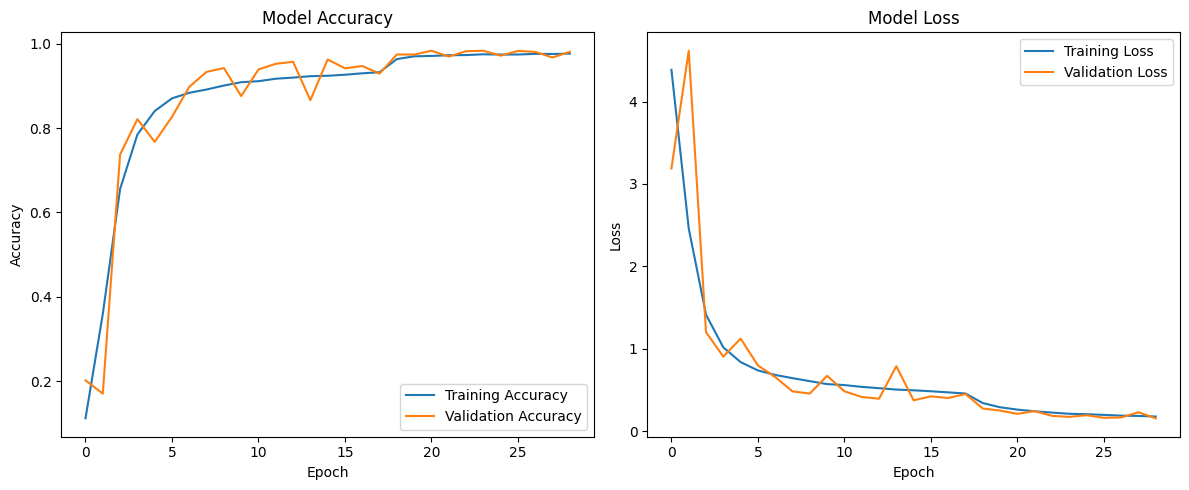

In [16]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
# Create a separate test generator if you haven't already
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '../dataset/asl_alphabet_train',  # Or a separate test folder if available
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset=None,  # No subset for test data
)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


Found 87000 images belonging to 29 classes.


/home/adithya/projects/ASL-CNN-Project/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2719/2719 ━━━━━━━━━━━━━━━━━━━━ 143s 52ms/step - accuracy: 0.9972 - loss: 0.1684
Test accuracy: 0.9960
Test loss: 0.1728


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Get true labels and predictions
test_generator.reset()
y_true = test_generator.classes

# Get predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report for detailed metrics per class
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))


ModuleNotFoundError: No module named 'sklearn'

In [12]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Define dataset paths
original_dataset_dir = '../dataset/asl_alphabet_train'  # Path to your original dataset
base_dir = '../dataset/asl_split'  # Directory to store the split datasets

# Create directories
os.makedirs(base_dir, exist_ok=True)
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create train, validation, and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get all class folders
classes = os.listdir(original_dataset_dir)

# Create class directories and split data
for cls in classes:
    # Create class directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
    
    # Get all images in the class
    class_path = os.path.join(original_dataset_dir, cls)
    images = [img for img in os.listdir(class_path) if img.endswith(('.jpg'))]
    
    # First split: separate train+val from test (80/20)
    train_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Second split: separate train from validation (75/25 of the 80% train+val)
    # This gives approx. 60% train, 20% validation, 20% test overall
    train_images, val_images = train_test_split(train_val_images, test_size=0.25, random_state=42)
    
    # Copy images to respective directories
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, cls, img)
        shutil.copy(src, dst)
    
    for img in val_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(val_dir, cls, img)
        shutil.copy(src, dst)
    
    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(test_dir, cls, img)
        shutil.copy(src, dst)
    
    print(f"Class {cls}: {len(train_images)} training, {len(val_images)} validation, {len(test_images)} test images")


Class A: 1800 training, 600 validation, 600 test images
Class K: 1800 training, 600 validation, 600 test images
Class C: 1800 training, 600 validation, 600 test images
Class W: 1800 training, 600 validation, 600 test images
Class del: 1800 training, 600 validation, 600 test images
Class I: 1800 training, 600 validation, 600 test images
Class X: 1800 training, 600 validation, 600 test images
Class G: 1800 training, 600 validation, 600 test images
Class U: 1800 training, 600 validation, 600 test images
Class S: 1800 training, 600 validation, 600 test images
Class Y: 1800 training, 600 validation, 600 test images
Class nothing: 1800 training, 600 validation, 600 test images
Class R: 1800 training, 600 validation, 600 test images
Class B: 1800 training, 600 validation, 600 test images
Class P: 1800 training, 600 validation, 600 test images
Class Q: 1800 training, 600 validation, 600 test images
Class space: 1800 training, 600 validation, 600 test images
Class T: 1800 training, 600 validati

In [13]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout2D, Add, Multiply, Reshape, Permute
from tensorflow.keras.layers import LayerNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import tensorflow as tf
import math
import numpy as np

# Enhanced data augmentation
# Create separate generators for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    shear_range=0.1,
    channel_shift_range=0.1
)

# Validation and test data should only be rescaled, not augmented
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Define a simple self-attention module
def self_attention_block(inputs, filters):
    # Spatial attention
    x = Conv2D(filters//8, kernel_size=1)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Generate attention map
    attention = Conv2D(1, kernel_size=1)(x)
    attention = Activation('sigmoid')(attention)
    
    # Apply attention
    return Multiply()([inputs, attention])

# Residual block with attention
def residual_block(inputs, filters, kernel_size=3, strides=1, attention=True):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same', 
               kernel_regularizer=l2(0.0018))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same',
               kernel_regularizer=l2(0.0018))(x)
    x = BatchNormalization()(x)
    
    # Add attention if requested
    if attention:
        x = self_attention_block(x, filters)
    
    # Handle input shape mismatch for the residual connection
    if strides > 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = inputs
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Cyclic learning rate scheduler
def cyclic_lr(epoch):
    initial_lr = 0.001
    max_lr = 0.01
    step_size = 10.0
    
    cycle = math.floor(1 + epoch / (2 * step_size))
    x = abs(epoch / step_size - 2 * cycle + 1)
    lr = initial_lr + (max_lr - initial_lr) * max(0, (1 - x))
    return lr

# Build enhanced model
inputs = Input(shape=(200, 200, 3))

# Initial convolution
x = Conv2D(32, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.0018))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Block 1 with residual connections
x = residual_block(x, 32, strides=1, attention=False)
x = residual_block(x, 32, strides=2, attention=True)  # Downsample
x = SpatialDropout2D(0.1)(x)

# Block 2 with residual connections
x = residual_block(x, 64, strides=1, attention=False)
x = residual_block(x, 64, strides=2, attention=True)  # Downsample
x = SpatialDropout2D(0.15)(x)

# Block 3 with residual connections and attention
x = residual_block(x, 128, strides=1, attention=True)
x = residual_block(x, 128, strides=2, attention=True)  # Downsample
x = SpatialDropout2D(0.2)(x)

# Global pooling and feature normalization
x = GlobalAveragePooling2D()(x)
x = LayerNormalization()(x)

# Classification head
x = Dense(128, activation='relu', kernel_regularizer=l2(0.0025))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

outputs = Dense(29, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile with a slightly lower initial learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Display model summary
model.summary()

Found 52200 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 200, 200,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 200, 200,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 200, 200,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 200, 200,  │      9,248 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 200,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 200, 200,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 200, 200,  │      9,248 │ activation_1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 200,  │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 200, 200,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 200, 200,  │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 100, 100,  │      9,248 │ activation_2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 100,  │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 100, 100,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 100, 100,  │      9,248 │ activation_3[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 100,  │        128 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 100, 100,  │        132 │ batch_normalizat

 Total params: 747,337 (2.85 MB)

 Trainable params: 744,305 (2.84 MB)

 Non-trainable params: 3,032 (11.84 KB)

In [22]:
# Define callbacks with both cyclic LR and reduce on plateau for flexibility
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=8,  # Increased patience to allow learning more complex patterns
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

# Option 1: Use cyclic learning rate
lr_scheduler = LearningRateScheduler(cyclic_lr)

# Choose which LR strategy to use:
# callbacks = [early_stopping, lr_scheduler]  # Cyclic LR
callbacks = [early_stopping, reduce_lr]     # Reduce on plateau

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=75,  # Increased epochs with reliable early stopping
    callbacks=callbacks,
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

/home/adithya/projects/ASL-CNN-Project/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
 694/1632 ━━━━━━━━━━━━━━━━━━━━ 2:55 188ms/step - accuracy: 0.0441 - loss: 5.8735

2025-04-27 01:45:18.298460: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion', 12 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_7', 464 bytes spill stores, 464 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 172 bytes spill stores, 172 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_3', 4 bytes spill stores, 4 bytes spill loads



1632/1632 ━━━━━━━━━━━━━━━━━━━━ 380s 220ms/step - accuracy: 0.0612 - loss: 5.4056 - val_accuracy: 0.2126 - val_loss: 3.2948 - learning_rate: 5.0000e-04
Epoch 2/75
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 336s 205ms/step - accuracy: 0.2534 - loss: 3.0839 - val_accuracy: 0.6294 - val_loss: 1.5605 - learning_rate: 5.0000e-04
Epoch 3/75
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 347s 213ms/step - accuracy: 0.5438 - loss: 1.8313 - val_accuracy: 0.6420 - val_loss: 1.4908 - learning_rate: 5.0000e-04
Epoch 4/75
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 352s 215ms/step - accuracy: 0.7124 - loss: 1.2717 - val_accuracy: 0.8737 - val_loss: 0.7743 - learning_rate: 5.0000e-04
Epoch 5/75
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 347s 212ms/step - accuracy: 0.7972 - loss: 1.0040 - val_accuracy: 0.8989 - val_loss: 0.6645 - learning_rate: 5.0000e-04
Epoch 6/75
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 343s 210ms/step - accuracy: 0.8378 - loss: 0.8603 - val_accuracy: 0.9642 - val_loss: 0.4765 - learning_rate: 5.0000e-04
Epoch 7/75
1632/1632 ━━━━━━━━━━━━━━━━━━

In [25]:
model.save('/home/adithya/projects/ASL-CNN-Project/models/asl_custom_cnn.h5')


K-fold cross validation

In [4]:
import os
import numpy as np
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from tqdm import tqdm
import gc

# Ensure TensorFlow doesn't allocate all GPU memory at once
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Parameters
k_folds = 5
img_size = (200, 200)
batch_size = 32
base_dir = '../dataset/asl_split'  # The directory containing train, validation, test folders
num_classes = 29
epochs = 20  # Reduced for k-fold evaluation

# Create function to build model (same as your existing model)
def create_model():
    # Import the necessary model building code
    from tensorflow.keras import Input, Model
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
    from tensorflow.keras.layers import Dense, Dropout, SpatialDropout2D, Add, Multiply, Activation
    from tensorflow.keras.layers import LayerNormalization
    from tensorflow.keras.regularizers import l2
    
    # Define helper functions for model architecture
    def self_attention_block(inputs, filters):
        x = Conv2D(filters//8, kernel_size=1)(inputs)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        attention = Conv2D(1, kernel_size=1)(x)
        attention = Activation('sigmoid')(attention)
        return Multiply()([inputs, attention])
    
    def residual_block(inputs, filters, kernel_size=3, strides=1, attention=True):
        x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same', 
               kernel_regularizer=l2(0.0018))(inputs)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        
        x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same',
               kernel_regularizer=l2(0.0018))(x)
        x = BatchNormalization()(x)
        
        if attention:
            x = self_attention_block(x, filters)
        
        if strides > 1 or inputs.shape[-1] != filters:
            shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(inputs)
            shortcut = BatchNormalization()(shortcut)
        else:
            shortcut = inputs
        
        x = Add()([x, shortcut])
        x = Activation('relu')(x)
        return x
    
    # Build the model
    inputs = Input(shape=(200, 200, 3))
    
    # Initial convolution
    x = Conv2D(32, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.0018))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Block 1 with residual connections
    x = residual_block(x, 32, strides=1, attention=False)
    x = residual_block(x, 32, strides=2, attention=True)  # Downsample
    x = SpatialDropout2D(0.1)(x)
    
    # Block 2 with residual connections
    x = residual_block(x, 64, strides=1, attention=False)
    x = residual_block(x, 64, strides=2, attention=True)  # Downsample
    x = SpatialDropout2D(0.15)(x)
    
    # Block 3 with residual connections and attention
    x = residual_block(x, 128, strides=1, attention=True)
    x = residual_block(x, 128, strides=2, attention=True)  # Downsample
    x = SpatialDropout2D(0.2)(x)
    
    # Global pooling and feature normalization
    x = GlobalAveragePooling2D()(x)
    x = LayerNormalization()(x)
    
    # Classification head
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.0025))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# 1. Create a dataframe of all training images and their labels
def create_image_dataframe(train_dir):
    image_paths = []
    labels = []
    class_indices = {}
    
    # Get class indices
    for i, class_name in enumerate(sorted(os.listdir(train_dir))):
        class_indices[class_name] = i
    
    # Collect image paths and labels
    for class_name in sorted(os.listdir(train_dir)):
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths.append(os.path.join(class_path, img_name))
                    labels.append(class_indices[class_name])
    
    # Create DataFrame
    df = pd.DataFrame({
        'image_path': image_paths,
        'label': labels,
        'class_name': [os.path.basename(os.path.dirname(p)) for p in image_paths]
    })
    
    return df, class_indices

# 2. Set up directory structure for k-fold
def setup_kfold_dirs(fold_idx, class_indices):
    # Create temporary directories for this fold
    fold_dir = f'../dataset/fold_{fold_idx}'
    fold_train_dir = os.path.join(fold_dir, 'train')
    fold_val_dir = os.path.join(fold_dir, 'validation')
    
    # Clean any existing directories
    if os.path.exists(fold_dir):
        shutil.rmtree(fold_dir)
    
    # Create directories
    os.makedirs(fold_dir)
    os.makedirs(fold_train_dir)
    os.makedirs(fold_val_dir)
    
    # Create class subdirectories
    for class_name in class_indices.keys():
        os.makedirs(os.path.join(fold_train_dir, class_name))
        os.makedirs(os.path.join(fold_val_dir, class_name))
    
    return fold_dir, fold_train_dir, fold_val_dir

# 3. Create symbolic links for the fold's data
def create_fold_symlinks(df, train_idx, val_idx, fold_train_dir, fold_val_dir):
    # Create symbolic links for training data
    for idx in train_idx:
        src_path = os.path.abspath(df.iloc[idx]['image_path'])
        class_name = df.iloc[idx]['class_name']
        dst_dir = os.path.join(fold_train_dir, class_name)
        os.makedirs(dst_dir, exist_ok=True)
        dst_path = os.path.join(dst_dir, os.path.basename(src_path))
        if os.path.exists(src_path):
            os.symlink(src_path, dst_path)
        else:
            print(f"Warning: Source file not found: {src_path}")
    
    # Create symbolic links for validation data
    for idx in val_idx:
        src_path = os.path.abspath(df.iloc[idx]['image_path'])
        class_name = df.iloc[idx]['class_name']
        dst_dir = os.path.join(fold_val_dir, class_name)
        os.makedirs(dst_dir, exist_ok=True)
        dst_path = os.path.join(dst_dir, os.path.basename(src_path))
        if os.path.exists(src_path):
            os.symlink(src_path, dst_path)
        else:
            print(f"Warning: Source file not found: {src_path}")

# Main k-fold cross-validation
def run_kfold_cv():
    # Get the combined training and validation data
    train_dir = os.path.join(base_dir, 'train')
    df, class_indices = create_image_dataframe(train_dir)
    
    # Initialize metrics storage
    fold_accuracies = []
    fold_losses = []
    
    # Set up stratified k-fold
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    # Define callbacks
    early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.00001
    )
    
    # Loop through each fold
    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(df['image_path'], df['label'])):
        print(f'\n{"="*50}')
        print(f'Training for fold {fold_idx+1}/{k_folds}')
        print(f'{"="*50}')
        
        # Setup directories for this fold
        fold_dir, fold_train_dir, fold_val_dir = setup_kfold_dirs(fold_idx, class_indices)
        
        try:
            # Create symlinks for this fold's data
            print("Creating symlinks for fold data...")
            create_fold_symlinks(df, train_idx, val_idx, fold_train_dir, fold_val_dir)
            
            # Data generators for this fold
            train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                brightness_range=[0.7, 1.3],
                fill_mode='nearest',
                shear_range=0.1,
                channel_shift_range=0.1
            )
            
            val_datagen = ImageDataGenerator(rescale=1./255)
            
            # Create generators that load images on-demand, not all at once
            train_generator = train_datagen.flow_from_directory(
                fold_train_dir,
                target_size=img_size,
                batch_size=batch_size,
                class_mode='categorical',
                shuffle=True
            )
            
            val_generator = val_datagen.flow_from_directory(
                fold_val_dir,
                target_size=img_size,
                batch_size=batch_size,
                class_mode='categorical',
                shuffle=False
            )
            
            # Create a fresh model for each fold
            model = create_model()
            
            # Train the model
            history = model.fit(
                train_generator,
                validation_data=val_generator,
                epochs=epochs,
                callbacks=[early_stopping, reduce_lr],
                verbose=1
            )
            
            # Evaluate on validation data
            scores = model.evaluate(val_generator, verbose=1)
            
            # Store metrics
            fold_accuracies.append(scores[1])
            fold_losses.append(scores[0])
            
            print(f'Score for fold {fold_idx+1}: Loss = {scores[0]:.4f}, Accuracy = {scores[1]*100:.2f}%')
            
            # Clear session to prevent memory leaks
            tf.keras.backend.clear_session()
            
            # Force garbage collection
            gc.collect()
            
        finally:
            # Clean up fold directory
            if os.path.exists(fold_dir):
                shutil.rmtree(fold_dir)
    
    # Print final k-fold results
    print(f'\n{"="*50}')
    print(f'K-FOLD CROSS-VALIDATION RESULTS FOR {k_folds} FOLDS')
    print(f'{"="*50}')
    print(f'Average Loss: {np.mean(fold_losses):.4f} (±{np.std(fold_losses):.4f})')
    print(f'Average Accuracy: {np.mean(fold_accuracies)*100:.2f}% (±{np.std(fold_accuracies)*100:.2f}%)')
    
    return fold_accuracies, fold_losses

# Run k-fold cross-validation
fold_accuracies, fold_losses = run_kfold_cv()



Training for fold 1/5
Creating symlinks for fold data...
Found 41760 images belonging to 29 classes.
Found 10440 images belonging to 29 classes.


/home/adithya/projects/ASL-CNN-Project/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1745736951.447810  254105 service.cc:152] XLA service 0x7f1750003580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745736951.447892  254105 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-04-27 10:55:51.791904: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745736953.431542  254105 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1745736983.036017  254105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-04-27 10:56:23.058340: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:382] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this messa

1305/1305 ━━━━━━━━━━━━━━━━━━━━ 304s 202ms/step - accuracy: 0.0560 - loss: 5.5187 - val_accuracy: 0.1512 - val_loss: 3.7766 - learning_rate: 5.0000e-04
Epoch 2/20
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 263s 201ms/step - accuracy: 0.1952 - loss: 3.4853 - val_accuracy: 0.4835 - val_loss: 2.0740 - learning_rate: 5.0000e-04
Epoch 3/20
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 268s 205ms/step - accuracy: 0.4511 - loss: 2.1768 - val_accuracy: 0.6092 - val_loss: 1.5742 - learning_rate: 5.0000e-04
Epoch 4/20
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 269s 206ms/step - accuracy: 0.6543 - loss: 1.4825 - val_accuracy: 0.8489 - val_loss: 0.8771 - learning_rate: 5.0000e-04
Epoch 5/20
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 271s 208ms/step - accuracy: 0.7447 - loss: 1.1701 - val_accuracy: 0.9285 - val_loss: 0.6198 - learning_rate: 5.0000e-04
Epoch 6/20
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 275s 211ms/step - accuracy: 0.8029 - loss: 0.9781 - val_accuracy: 0.9305 - val_loss: 0.5881 - learning_rate: 5.0000e-04
Epoch 7/20
1305/1305 ━━━━━━━━━━━━━━━━━━

In [9]:
from tensorflow.keras.models import load_model

model = load_model('../models/asl_custom_cnn.h5')

544/544 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step


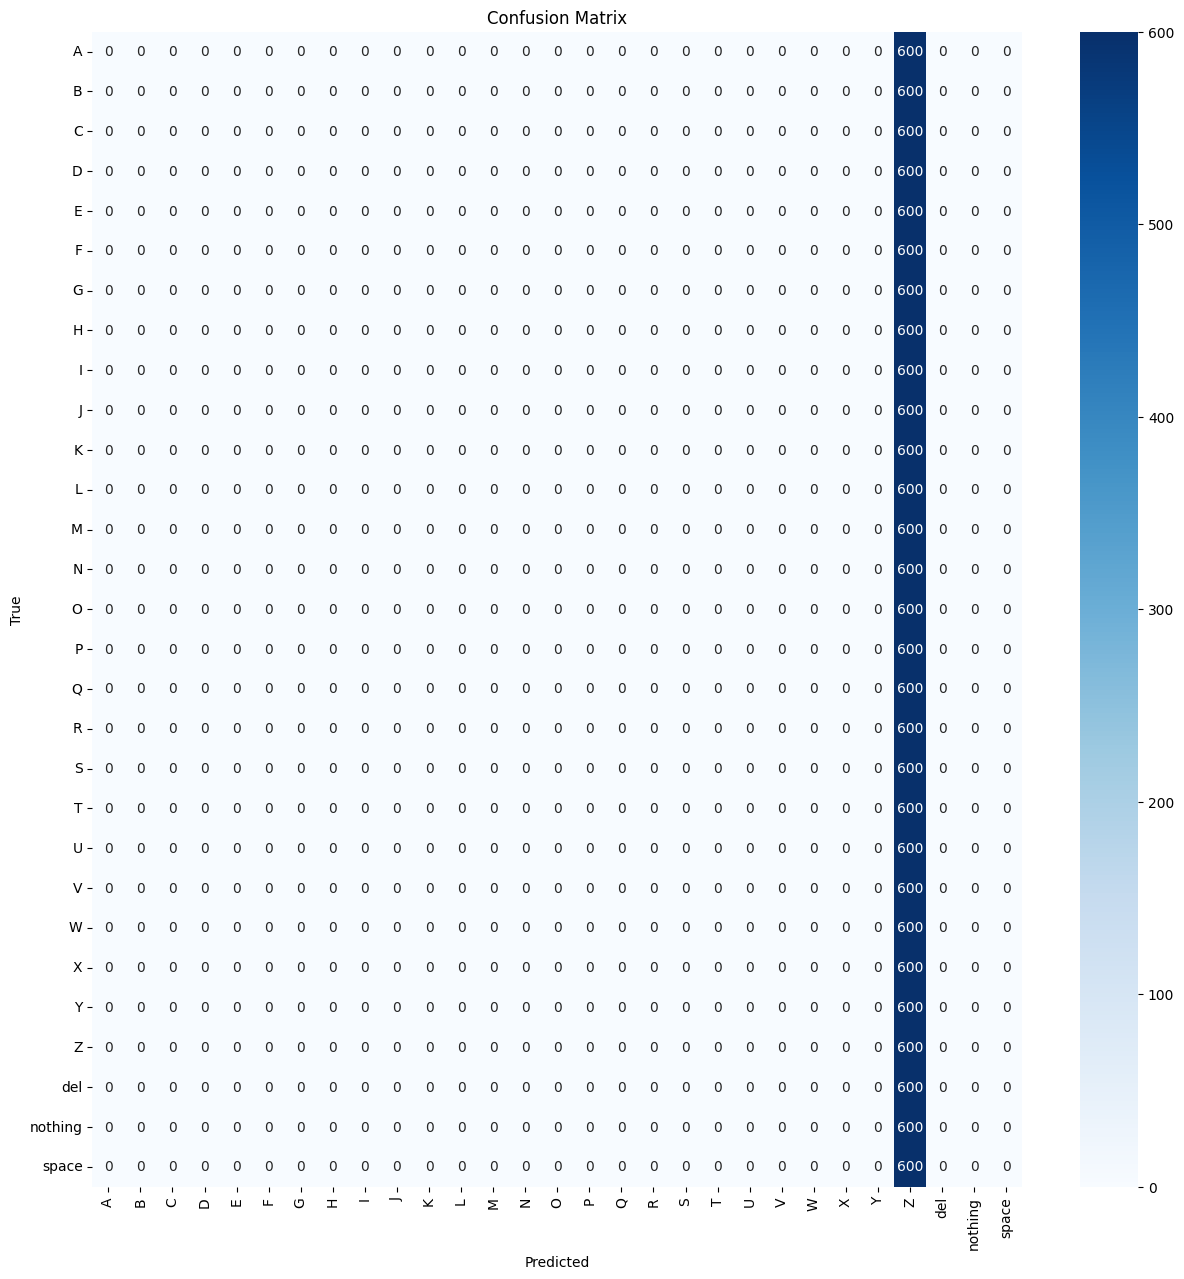

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       600
           B       0.00      0.00      0.00       600
           C       0.00      0.00      0.00       600
           D       0.00      0.00      0.00       600
           E       0.00      0.00      0.00       600
           F       0.00      0.00      0.00       600
           G       0.00      0.00      0.00       600
           H       0.00      0.00      0.00       600
           I       0.00      0.00      0.00       600
           J       0.00      0.00      0.00       600
           K       0.00      0.00      0.00       600
           L       0.00      0.00      0.00       600
           M       0.00      0.00      0.00       600
           N       0.00      0.00      0.00       600
           O       0.00      0.00      0.00       600
           P       0.00      0.00      0.00       600
           Q       0.00      0.00      0.00       600
           R       0.00    

/home/adithya/projects/ASL-CNN-Project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adithya/projects/ASL-CNN-Project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adithya/projects/ASL-CNN-Project/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
# 1. Load your model (if not already loaded)
from tensorflow.keras.models import load_model
model = load_model('models/asl_custom_cnn.h5')

# 2. Prepare your test generator (make sure it's NOT shuffled)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '../dataset/asl_split/test',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # CRITICAL: must be False for proper evaluation
)

# 3. Generate predictions properly
test_generator.reset()  # IMPORTANT: reset before prediction
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# 4. Create a classification report with proper options
print(classification_report(
    y_true, 
    y_pred_classes,
    target_names=list(test_generator.class_indices.keys()),
    zero_division=0  # Handle zero division warning
))
